## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 5: Data Visualization 
#### Excercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, widgets

# Excercise 1
In this exercise, we will be using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use boxplots to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    b.	Use a histogram to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    c.	use subplots to put the results of a and b on top of one another to create a visual that compares the two populations even better. 


In [2]:
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
uni_df.head()

,College Name,State,Public/Private,num_appli_rec,num_appl_accepted,num_new_stud_enrolled,in-state tuition,out-of-state tuition,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,Private,193,146,55,7560,7560,76,11.9,15
1,University of Alaska at Fairbanks,AK,Public,1852,1427,928,1742,5226,67,10.0,60
2,University of Alaska Southeast,AK,Public,146,117,89,1742,5226,39,9.5,39
3,University of Alaska at Anchorage,AK,Public,2065,1598,1162,1742,5226,48,13.7,60
4,Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,1700,3400,53,14.3,40


a. 

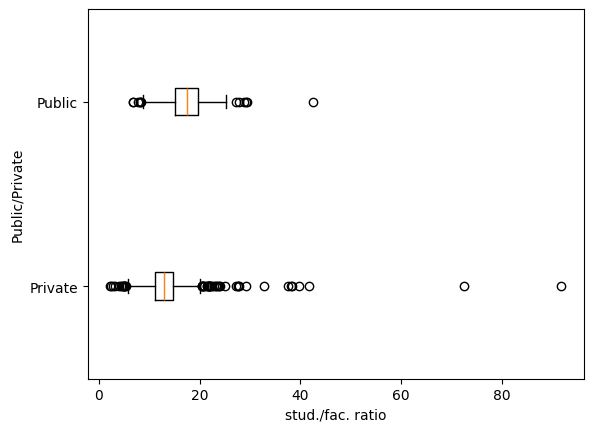

In [3]:
private_public_possiblilites = uni_df['Public/Private'].unique()

box_sr = pd.Series('', index=private_public_possiblilites)

for poss in private_public_possiblilites:
    BM = uni_df['Public/Private'] == poss
    box_sr[poss] = uni_df[BM]['stud./fac. ratio']
    
plt.boxplot(box_sr, vert=False)
plt.yticks([1, 2], private_public_possiblilites)
plt.xlabel('stud./fac. ratio')
plt.ylabel('Public/Private')
plt.show()

b. 

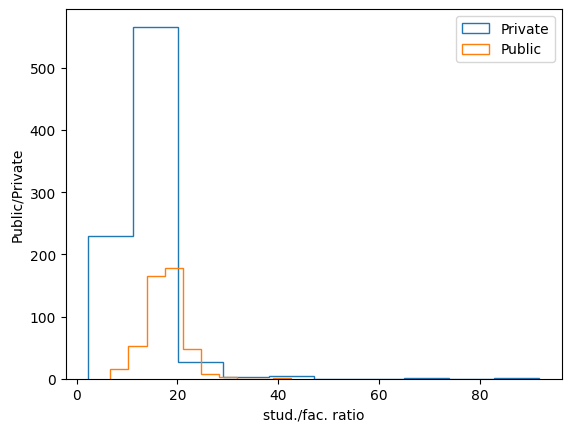

In [4]:
private_public_possiblilites = uni_df['Public/Private'].unique()

for poss in private_public_possiblilites:
    BM = uni_df['Public/Private'] == poss
    plt.hist(uni_df[BM]['stud./fac. ratio'],
            histtype='step', label=poss)
    
plt.legend()
plt.xlabel('stud./fac. ratio')
plt.ylabel('Public/Private')
plt.show()

c. 

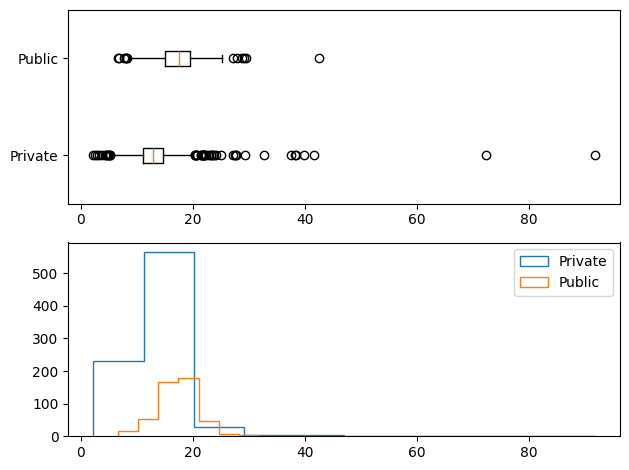

In [5]:
private_public_possiblilites = uni_df['Public/Private'].unique()

dataForBox_dic = {}

for poss in private_public_possiblilites:
    BM = uni_df['Public/Private'] == poss
    dataForBox_dic[poss] = uni_df[BM]['stud./fac. ratio']
    
plt.subplot(2, 1, 1)
plt.boxplot(dataForBox_dic.values(), vert=False)
plt.yticks([1, 2], private_public_possiblilites)

plt.subplot(2, 1, 2)
for poss in private_public_possiblilites:
    BM = uni_df['Public/Private'] == poss
    plt.hist(uni_df[BM]['stud./fac. ratio'],
            histtype='step', label=poss)
plt.legend()

plt.tight_layout()
plt.show()

# Excercise 2

In this exercise, we will continue using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use a bar chart to compare the private/public ratio of all the states in the dataset. In this example, the populations we are comparing are the states. 
    b.	Improve the visualizations by sorting the states on the visuals based on the total number of universities they have.
    c.	Create a stacked bar chart that shows the compare the percentages of public and private schools across different states. 

a.

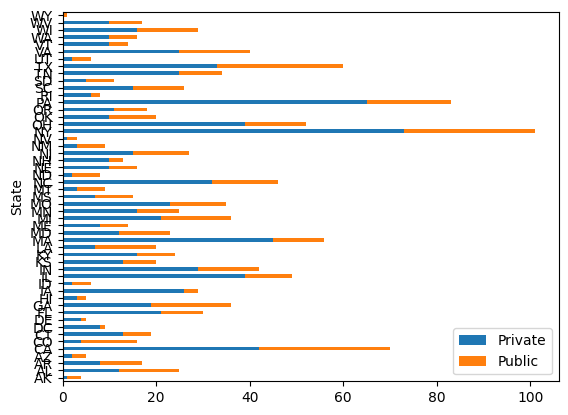

In [6]:
uni_df.groupby(['State', 'Public/Private']).size().unstack().plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()

b.

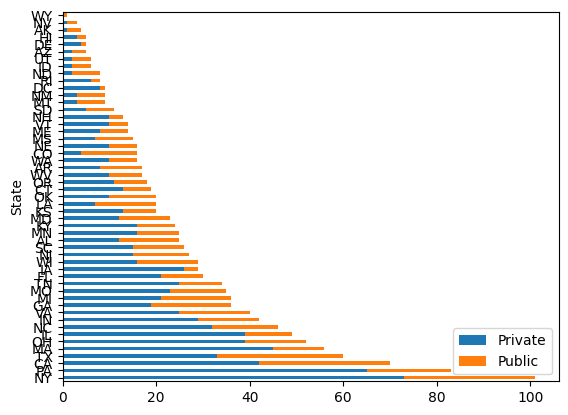

In [7]:
state_counts = uni_df.groupby(['State', 'Public/Private']).size().unstack()
state_counts['Total'] = state_counts.sum(axis=1)

state_counts.sort_values(by='Total', ascending=False).drop(columns='Total').plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()

c.

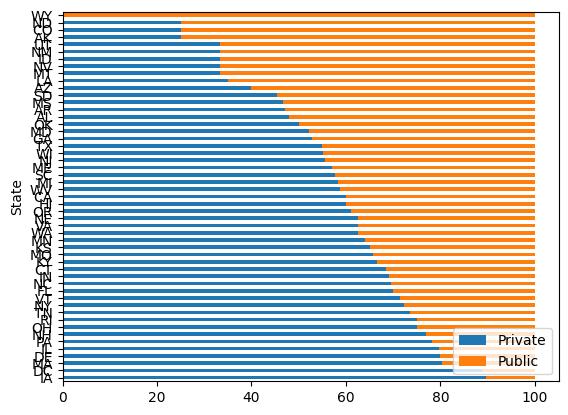

In [8]:
state_counts = uni_df.groupby(['State', 'Public/Private']).size().unstack()
state_counts['Total'] = state_counts.sum(axis=1)
state_percentages = state_counts.div(state_counts['Total'], axis=0) * 100
state_percentages = state_percentages.drop(columns='Total')
state_percentages = state_percentages.sort_values(by='Private', ascending=False)

state_percentages.plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()

# Excercise 3

For this example, we will be using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Create a visual that compares the relationship between all the happiness indices.
    b.	Use the visual you created in a) to report the happiness indices with strong relationships, and describe those relationships.
    c.	Confirm the relationship you found and described by calculating their correlation coefficients and adding these new pieces of information to your description to improve them. 


In [9]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

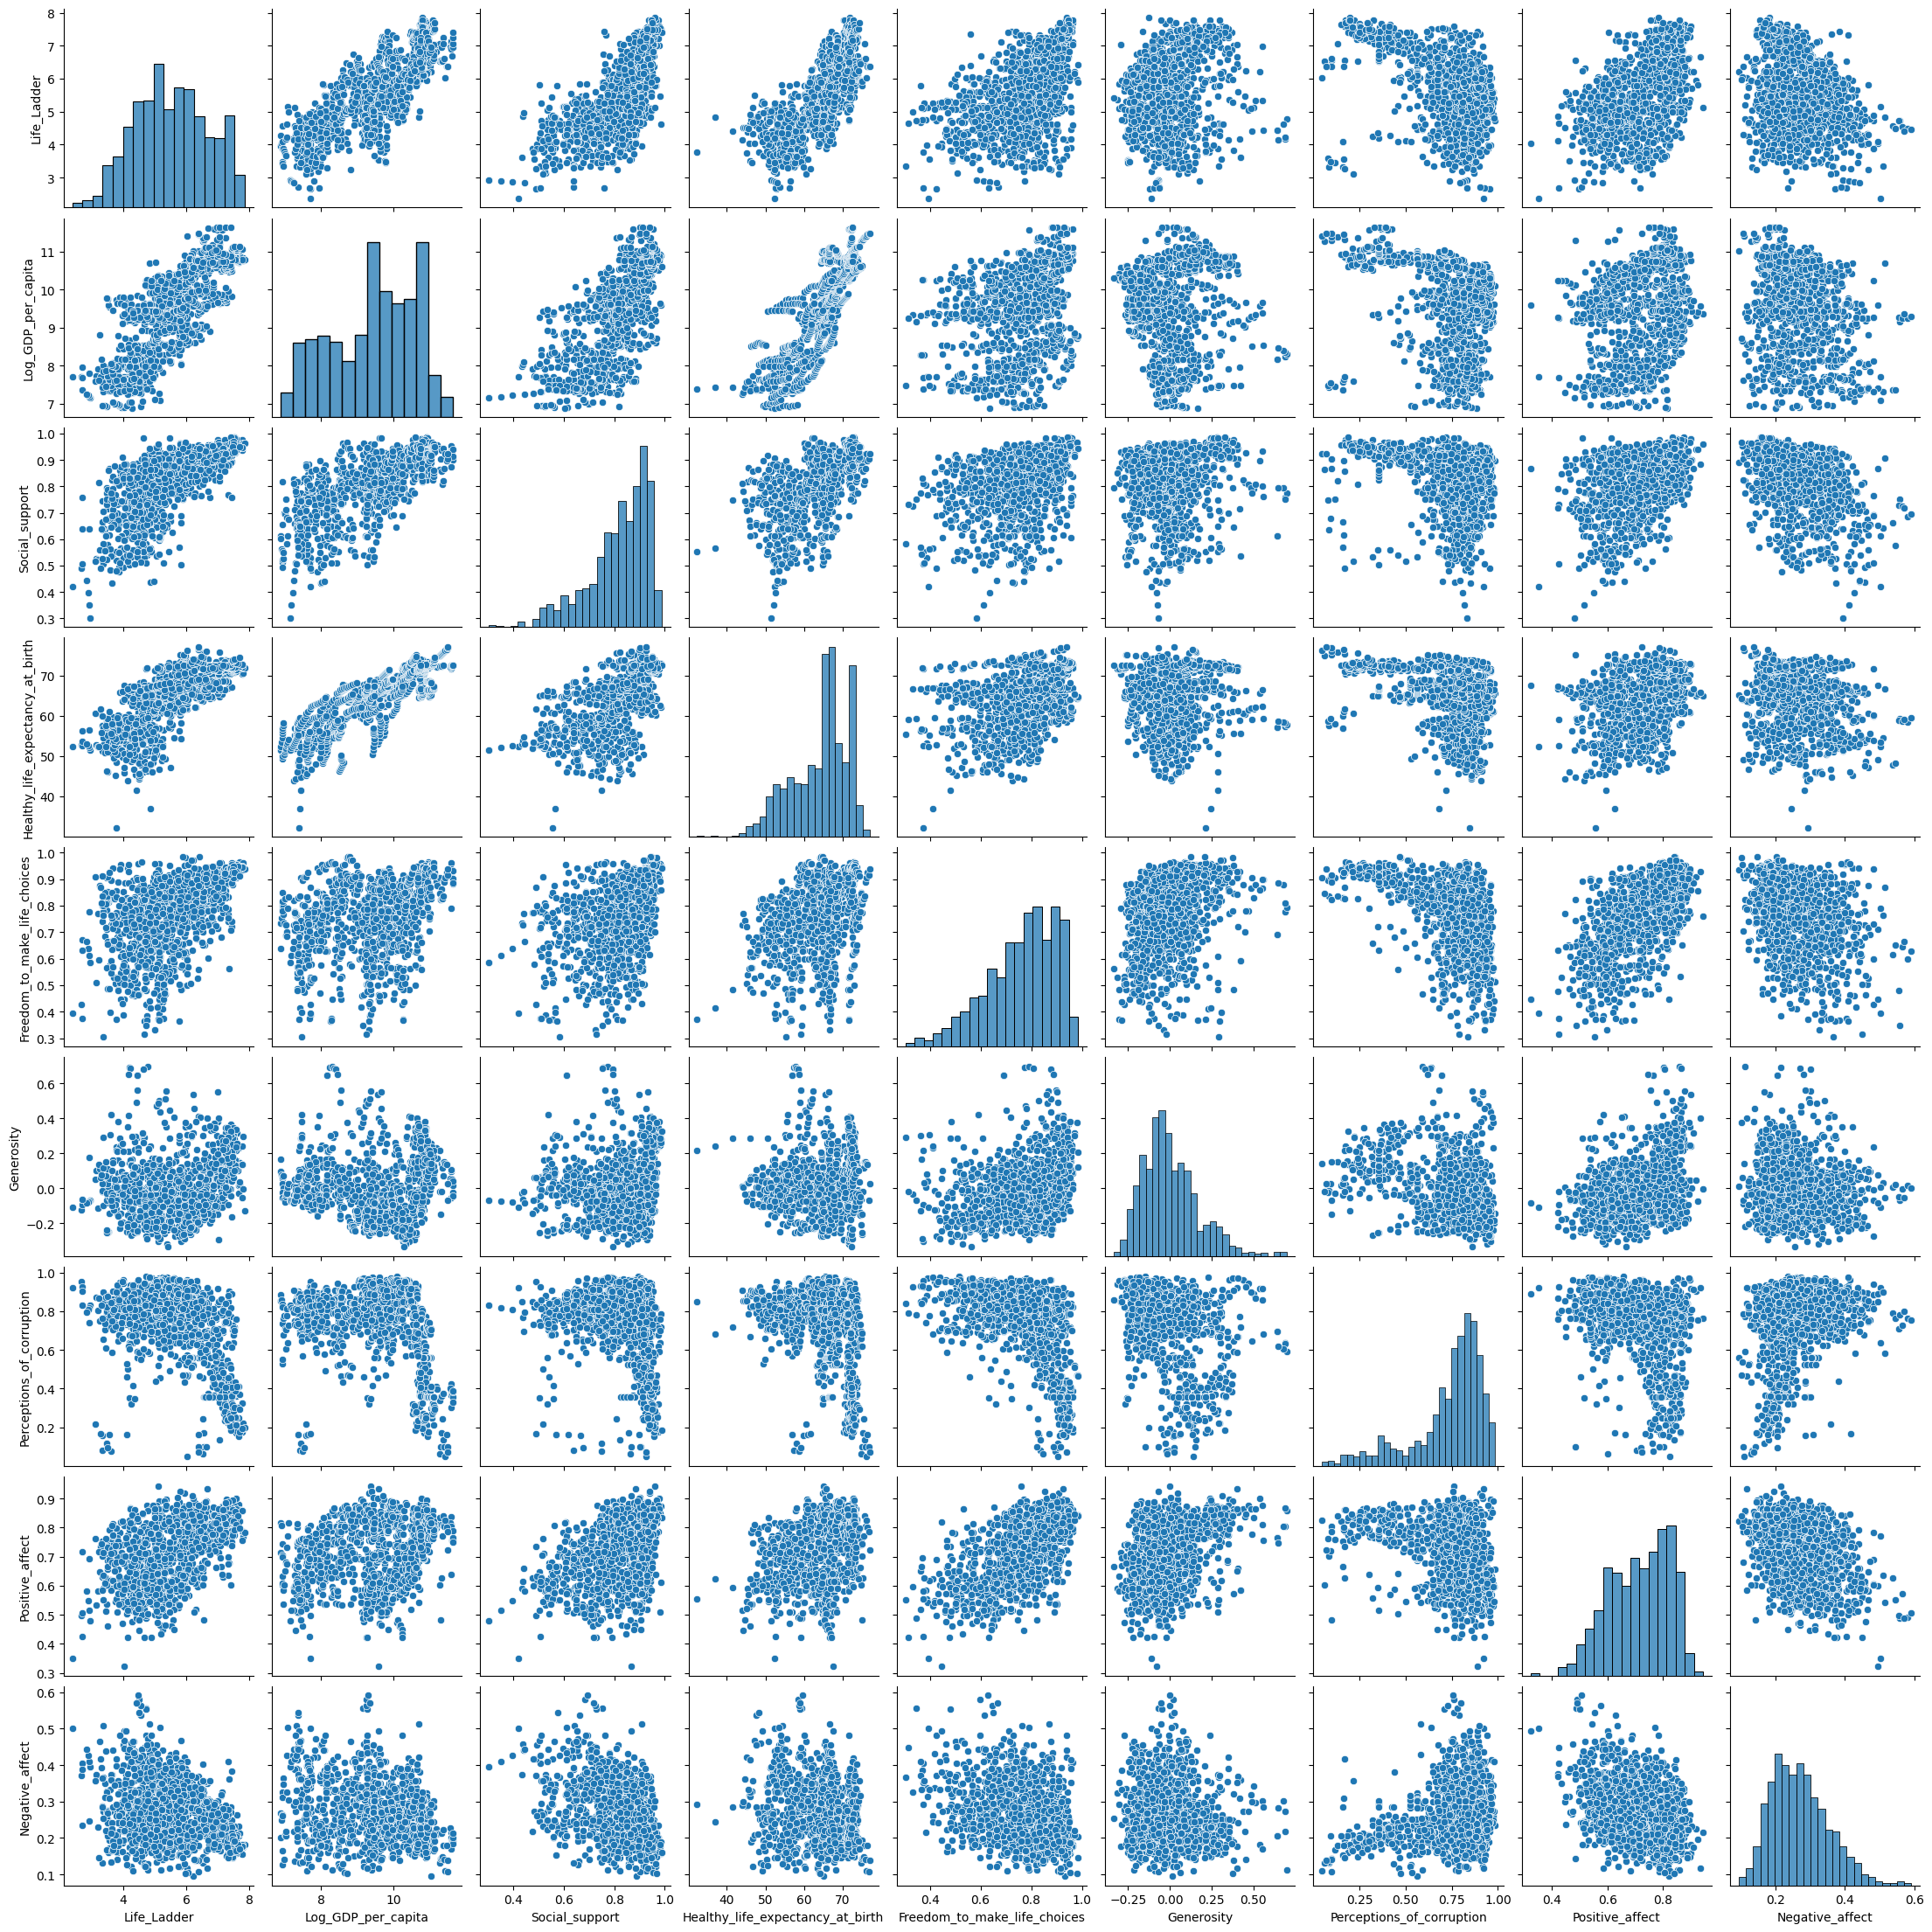

In [10]:
happiness_indices = [
    'Life_Ladder',
    'Log_GDP_per_capita',
    'Social_support',
    'Healthy_life_expectancy_at_birth',
    'Freedom_to_make_life_choices',
    'Generosity',
    'Perceptions_of_corruption',
    'Positive_affect',
    'Negative_affect'
]
sns.pairplot(report_df[happiness_indices])
plt.show()

b. 

In [11]:
# base on a

c.

In [12]:
corr_matrix = report_df[happiness_indices].corr()
corr_matrix

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
Life_Ladder,1.000000,0.798912,0.723686,0.758287,0.518618,0.198072,-0.465268,0.518226,-0.302013
Log_GDP_per_capita,0.798912,1.000000,0.718969,0.857981,0.357799,0.010562,-0.368602,0.296845,-0.261958
Social_support,0.723686,0.718969,1.000000,0.629507,0.421854,0.099973,-0.258575,0.429687,-0.425569
Healthy_life_expectancy_at_birth,0.758287,0.857981,0.629507,1.000000,0.393043,0.018837,-0.353142,0.339499,-0.209444
Freedom_to_make_life_choices,0.518618,0.357799,0.421854,0.393043,1.000000,0.325176,-0.504291,0.635665,-0.313267
Generosity,0.198072,0.010562,0.099973,0.018837,0.325176,1.000000,-0.296068,0.359233,-0.121400
Perceptions_of_corruption,-0.465268,-0.368602,-0.258575,-0.353142,-0.504291,-0.296068,1.000000,-0.320755,0.345491
Positive_affect,0.518226,0.296845,0.429687,0.339499,0.635665,0.359233,-0.320755,1.000000,-0.372535
Negative_affect,-0.302013,-0.261958,-0.425569,-0.209444,-0.313267,-0.121400,0.345491,-0.372535,1.000000


📊 Strong & Notable Relationships Among Happiness Indices

1. Life Ladder & Log GDP per Capita
Correlation coefficient: +0.80

Interpretation: A very strong positive relationship. Countries with higher income per person tend to report greater happiness. Economic stability clearly supports life satisfaction.

2. Life Ladder & Healthy Life Expectancy
Correlation coefficient: +0.76

Interpretation: People in countries with longer, healthier lives tend to be happier. This emphasizes the impact of health systems and longevity on well-being.

3. Life Ladder & Social Support
Correlation coefficient: +0.72

Interpretation: Strong social connections contribute significantly to happiness. Societies with tight-knit communities and supportive networks foster greater life satisfaction.

4. Log GDP per Capita & Healthy Life Expectancy
Correlation coefficient: +0.86

Interpretation: The strongest correlation in your data. Countries with high economic wealth also have high life expectancy — likely due to better healthcare, nutrition, and living conditions.

5. Life Ladder & Freedom to Make Life Choices
Correlation coefficient: +0.52

Interpretation: People who feel more in control of their lives tend to be happier. This moderate relationship highlights the importance of autonomy and civil liberties.

6. Life Ladder & Positive Affect
Correlation coefficient: +0.52

Interpretation: Happier people tend to experience more positive emotions (joy, laughter, etc.). Though not a perfect match, the emotional tone of life plays a big role.

7. Life Ladder & Perceptions of Corruption
Correlation coefficient: −0.47

Interpretation: A moderate negative relationship. Higher levels of perceived corruption are associated with lower happiness, likely due to mistrust and systemic dissatisfaction.

⚠️ Weaker or Less Clear Relationships

1. Generosity & Life Ladder: +0.20

Suggests generosity doesn’t directly track with happiness, or that it varies a lot by culture/context.

2. Negative Affect & Life Ladder: −0.30

A mild negative relationship: more negative emotions slightly predict lower happiness, as expected.


# Excercise 4

For this exercise, we will continue using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Draw a visual that examine the relationship between the two attributes Continent and Generosity. 
    b.	Based on the visual, is there a relationship between the two attributes? Explain why.

a.

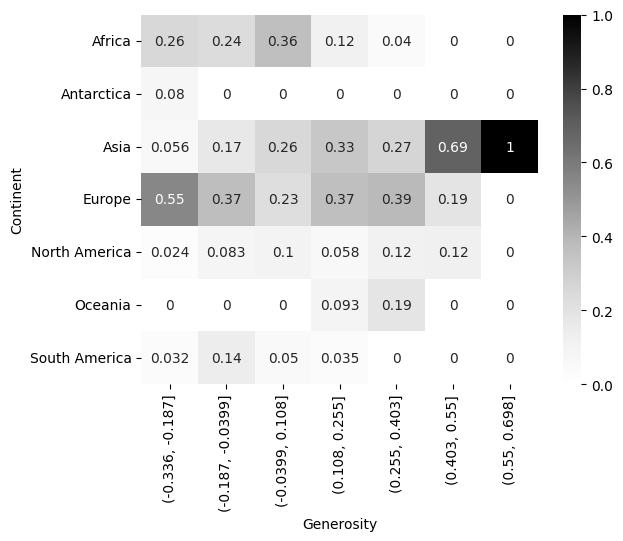

In [13]:
generosity_discretized = pd.cut(report_df['Generosity'], bins=7)
contingency_tbl = pd.crosstab(report_df['Continent'], generosity_discretized)
probability_tbl = contingency_tbl / contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5, cmap="Greys")
plt.show()

b.

Yes, there is a relationship between Continent and Generosity, as seen in the heatmap and table. Some continents have a higher likelihood of countries falling into specific generosity ranges than others — which indicates a non-random distribution

| Continent       | Pattern in Generosity Distribution |
|-----------------|------------------------------------|
| **Africa**      | Majority falls in lower bins (`-0.336` to `0.108`) – **high concentration in low generosity ranges**. |
| **Asia**        | **Spread across the entire spectrum**, **only region with values in the highest bin `(0.55, 0.698]`**. Indicates diverse and high generosity levels. |
| **Europe**      | Strong presence in low to moderate bins, but **absent from the top generosity bin**. |
| **North America**| Appears more in **lower-middle generosity ranges**, no countries in top bins. |
| **South America**| Heavily weighted toward **lower generosity**, barely any representation in higher bins. |
| **Oceania**     | **Very limited data**, but slight mid-range generosity. |
| **Antarctica**  | Likely an outlier or placeholder (ignore in analysis). |


# Excercise 5

For this exercise, we will be using whickham.csv. Draw the following described visualizations.

    a.	What is the numerical attribute in this dataset? Draw two different plots that summarize the population of data objects for the numerical attribute.
    b.	What are the categorical attributes in this dataset? Draw a plot per attribute that summarizes the population of the data object for each attribute. 
    c.	 Draw a visual that examine the relationship between outcome and smoker. Do you notice anything surprising about this visualization?
    d.	To demystify the surprising relationship you observed on c) run the following code, and study the visual it creates.

``
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()
``

    e.	Using the visual that was created under d) explain the surprising observation under c).
    f.	How many dimensions the visual that was created under d) has? How did we manage to add dimensions to the bar chart?


In [14]:
person_df = pd.read_csv('whickham.csv')
person_df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


a.

<Axes: ylabel='Frequency'>

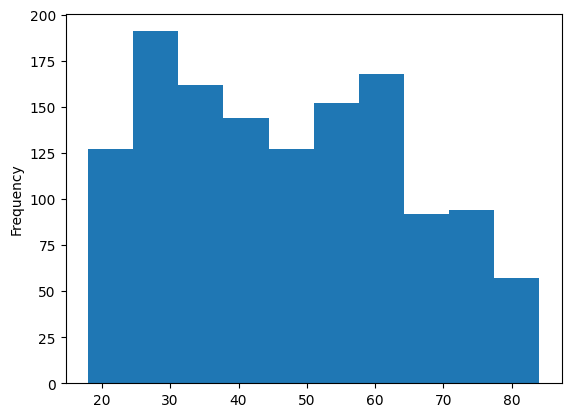

In [15]:
numerical_att = 'age'
person_df[numerical_att].plot.hist()

<Axes: >

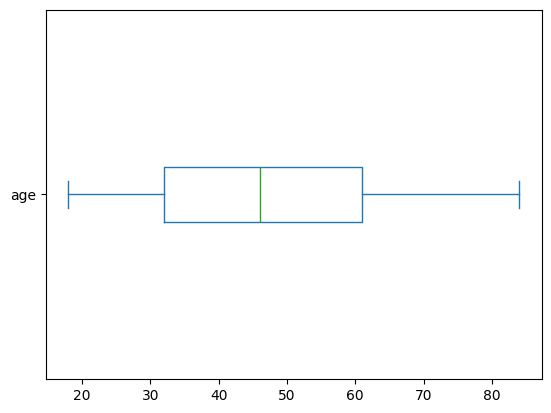

In [16]:
person_df[numerical_att].plot.box(vert=False)

b.

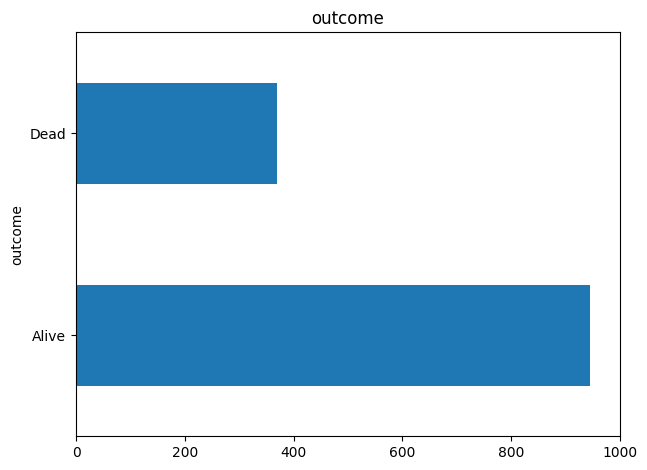

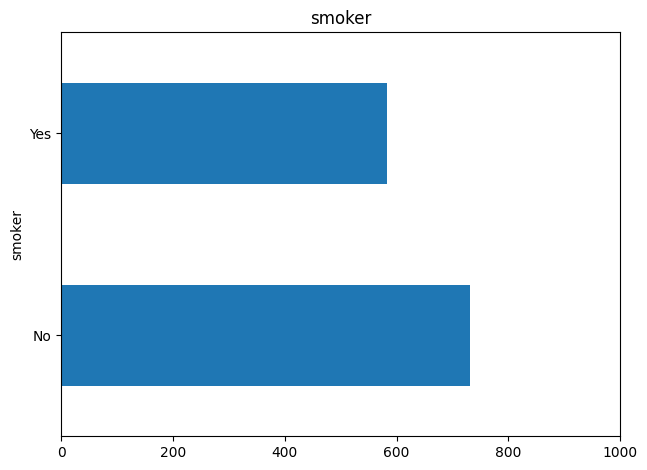

In [17]:
categorical_attributes = ['outcome', 'smoker']

for att in categorical_attributes:
    person_df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.xlim(0, 1000)
    plt.show()

c. 

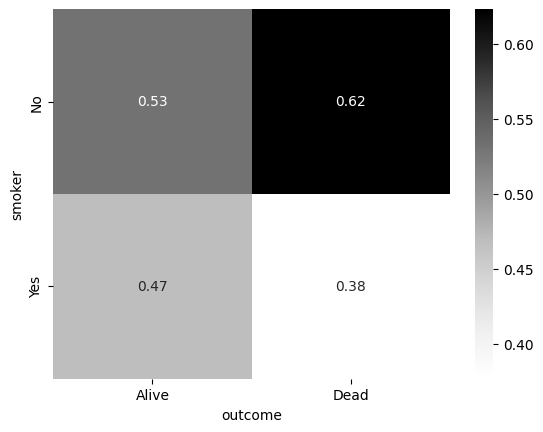

In [18]:
contingency_tbl = pd.crosstab(person_df['smoker'], person_df['outcome'])
probability_tbl = contingency_tbl / contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5, cmap="Greys")
plt.show()

More non-smokers died than smokers (contrary to expectations).

But this is misleading because it doesn’t account for age distribution (smokers might be younger).

d. 

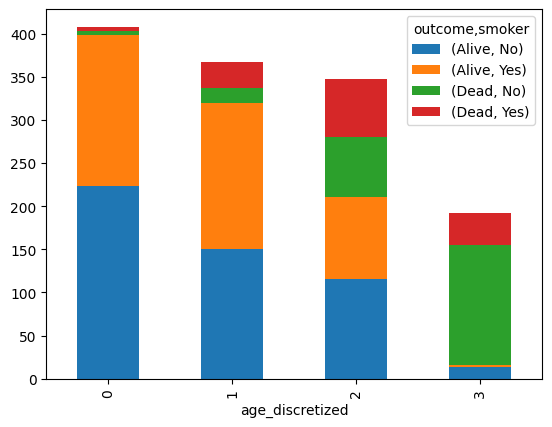

In [19]:
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()

e.

The surprising observation (smokers appearing to survive more) is due to:

1. Age Confounding:

   * Smokers are younger (mean age = 45) vs. non-smokers (mean age = 50).

   * Younger people naturally survive longer, regardless of smoking.

2. Simpson’s Paradox:

   * Aggregating data hides subgroup trends.

   * When stratified by age, smoking reduces survival in every age group.

Example:

Age Group 0 (youngest): Smokers have 90% survival vs. non-smokers' 95%.

Age Group 3 (oldest): Smokers have 20% survival vs. non-smokers' 30%.

f.

Number of Dimensions: 3

1. Primary Dimension (x-axis): age_discretized (4 age groups).

2. Secondary Dimension (color stacks): smoker (Yes/No).

3. Tertiary Dimension (stack height): outcome (Alive/Dead).

How Dimensions Were Added:

* groupby(): Split data by age_discretized and smoker (2 dimensions).

* value_counts() + unstack(): Pivoted outcome into columns (3rd dimension).

* plot.bar(stacked=True): Visualized stacks for Alive/Dead within each smoker-age group.

# Excercise 6

For this exercise, we will be using WH Report_preprocessed.csv. 

    a.	Use this dataset to create a 5-dimensional scatterplot to show the interactions between the following 5 attributes: year, Healthy_life_expectancy_at_birth, Social_support, Life_Ladder, population. Use the control bar for the “year”, marker size for population, marker color for Social_support, x-axis for Healthy_life_expectancy_at_birth, and y-axis for Life_Ladder.
    b.	Interact with and study the visual you created under a) and report your observations. 



In [20]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Define continent colors
continent_poss = report_df['Continent'].unique()
colors_dic = {
    'Asia': 'blue',
    'Europe': 'green',
    'Africa': 'red',
    'South America': 'cyan',
    'Oceania': 'magenta',
    'North America': 'yellow',
    'Antarctica': 'black'
}

# Sort by population for better visualization
report_df = report_df.sort_values('population', ascending=False)

def plot_year(year):
    plt.figure(figsize=(12, 8))
    
    for continent in continent_poss:
        # Filter data for year and continent
        mask = (report_df['year'] == year) & (report_df['Continent'] == continent)
        df_filtered = report_df[mask]
        
        # Skip if no data for this continent-year combination
        if len(df_filtered) == 0:
            continue
            
        # Create scatter plot with multiple dimensions
        plt.scatter(
            x=df_filtered['Healthy_life_expectancy_at_birth'],  # x-axis
            y=df_filtered['Life_Ladder'],                       # y-axis
            s=df_filtered['population']/500000,                 # marker size (scaled)
            c=df_filtered['Social_support'],                    # marker color
            cmap='viridis',                                     # color map
            vmin=0, vmax=1,                                     # color scale limits
            alpha=0.7,                                          # transparency
            edgecolors='w',                                     # white borders
            linewidths=0.5,                                     # border width
            label=continent
        )
    
    # Formatting
    plt.title(f'World Happiness Report - {year}')
    plt.xlabel('Healthy Life Expectancy at Birth')
    plt.ylabel('Life Ladder (Happiness Score)')
    plt.xlim(40, 85)
    plt.ylim(2, 8)
    plt.grid(alpha=0.2)
    
    # Add colorbar for Social_support
    plt.colorbar(label='Social Support')
    
    # Add legend for continents
    plt.legend(title='Continent', markerscale=0.7, loc=2)
    
    plt.show()

# Create interactive widget
interact(
    plot_year,
    year=IntSlider(min=report_df['year'].min(), 
                max=report_df['year'].max(),
                step=1,
                value=report_df['year'].median())
)

interactive(children=(IntSlider(value=2014, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

b. 

In [35]:
# based on a

# Excercise 7

For this exercise, we will continue using WH Report_preprocessed.csv. 

    a.	Create a visual that shows the trend of change for the attribute Generosity for all the countries in the dataset. To avoid making the visual overwhelming use the color grey for the line plots of all the countries, and don’t use a legend.
    b.	Add three more line plots to the previous visual using the color blue and a thicker line (linewidth=1.8) for the three countries, United States, China, and India. Work out the visual so it only shows you the legend of these three countries. The following screenshot shows the visual that is being described.



Figure 5. 23. Line plot comparing Generosity across all countries in 2010 and 2019 with emphasis on the United States, India, and China


    c.	Report your observations from the visual. Make sure to employ all of the line plots (grey and blue ones) in your observations 

a.

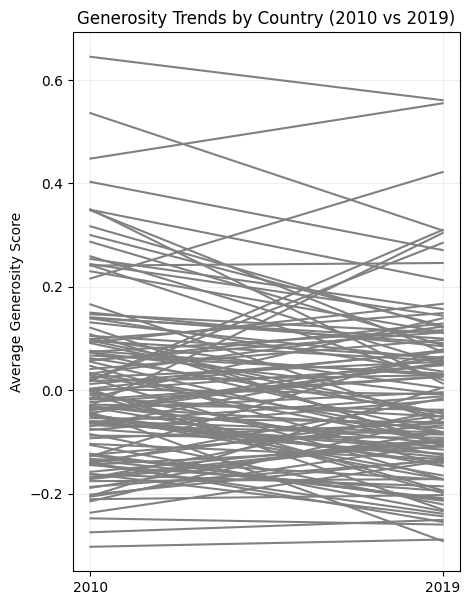

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
country_df = pd.read_csv('WH Report_preprocessed.csv')

# Aggregate Generosity by Continent and Year
byCountryYear_df = country_df.groupby(['Name','year'])['Generosity'].mean()

# Plot setup
plt.figure(figsize=(5, 7))

# Plot lines connecting 2010-2019 for each continent
for i, continent in enumerate(byCountryYear_df.index.get_level_values(0).unique()):
    plt.plot([2010, 2019], 
            byCountryYear_df.loc[continent, [2010, 2019]],
            color='grey',  # Using grey for all lines
            )

# Formatting
plt.xticks([2010, 2019])
plt.title('Generosity Trends by Country (2010 vs 2019)')
plt.ylabel('Average Generosity Score')
plt.grid(alpha=0.2)

b.

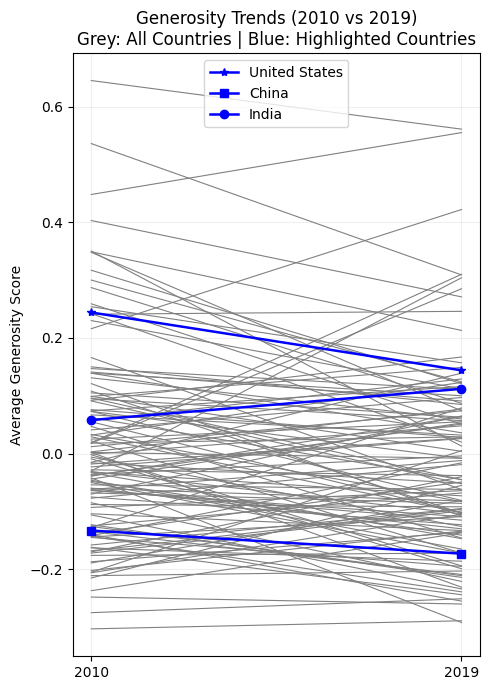

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
country_df = pd.read_csv('WH Report_preprocessed.csv')

# Aggregate Generosity by Country and Year
byCountryYear_df = country_df.groupby(['Name','year'])['Generosity'].mean()

# Plot setup
plt.figure(figsize=(5, 7))

# Plot grey lines for all countries
for country in byCountryYear_df.index.get_level_values(0).unique():
    plt.plot([2010, 2019], 
            byCountryYear_df.loc[country, [2010, 2019]],
            color='grey',
            linewidth=0.8)

highlight_markers = {
    'United States': '*',  # Star
    'China': 's',         # Square
    'India': 'o'        # Circle
}

# Highlight specific countries in blue
for country, marker in highlight_markers.items():
    plt.plot([2010, 2019],
            byCountryYear_df.loc[country, [2010, 2019]],
            color='blue',
            marker=marker,
            linewidth=1.8,
            label=country)

# Formatting
plt.xticks([2010, 2019])
plt.title('Generosity Trends (2010 vs 2019)\nGrey: All Countries | Blue: Highlighted Countries')
plt.ylabel('Average Generosity Score')
plt.grid(alpha=0.2)

# Add legend only for highlighted countries
plt.legend(loc=9)

plt.tight_layout()
plt.show()

c.

In [57]:
# refer to b